In [1]:
import sys
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt



path='/home/jbohne/sbu/'
sys.path.append(f'{path}taq_db/TAQ-Query-Scripts/data')
sys.path.append(f'{path}research/Adaptive_Signal_Estimation_Private')

from trend_filtering.adaptive_tf import adaptive_tf
from trend_filtering.test_adaptive_tf import test_adaptive_tf
from profiling.profiler import profile

In [2]:
trades=pd.read_csv(f'{path}taq_db/TAQ-Query-Scripts/data/AAPL_trades.csv',index_col=0).dropna()

price=trades['Trade_Price'].values

In [3]:
price.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

### Cross Validation is 10 fold + OOS Fit

Duality Gap is [[28.48]]
Duality Gap is [[9.91566257]]
Duality Gap is [[3.54920997]]
Duality Gap is [[1.83739334]]
Duality Gap is [[1.09857745]]
Duality Gap is [[0.98524891]]
Duality Gap is [[0.89990547]]
Duality Gap is [[0.79138131]]
Duality Gap is [[0.75121174]]
Duality Gap is [[0.65928315]]
Duality Gap is [[0.55626678]]
Duality Gap is [[0.48128374]]
Duality Gap is [[0.38114815]]
Duality Gap is [[0.29937857]]
Duality Gap is [[0.262753]]
Duality Gap is [[0.23672592]]
Duality Gap is [[0.20205317]]
Duality Gap is [[0.17398267]]
Duality Gap is [[0.1352715]]
Duality Gap is [[0.10908756]]
Duality Gap is [[0.07435955]]
Duality Gap is [[0.04098725]]
Duality Gap is [[0.02998516]]
Duality Gap is [[0.02391472]]
Duality Gap is [[0.01595931]]
Duality Gap is [[0.01208681]]
maxiter exceeded


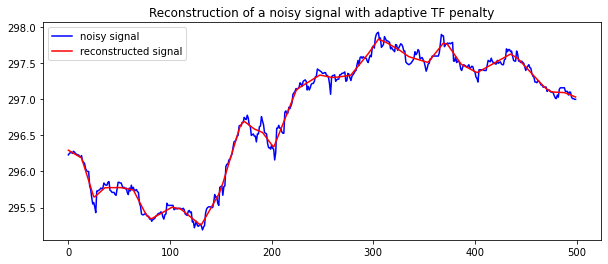

In [4]:


test_adaptive_tf(price,500,plot=True)

